# Practica 1
## Convoluciones
Computer Vision - Session 04.
Computer Science, ITAM.

January 30th, 2019
Paola Mejia

In [1]:
# imports
import numpy as np
from math import floor
from math import ceil
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray


1. Lee la imagen “Lena.jpg” incluida en la carpeta, mantenla en memoria como escala de grises en
tamaño 200x200 pixeles, cuyos valores deben estar entre 0 y 1.


Original image size (256, 256)
New image size (200, 200)
Minimum 0.07436862745098123
Maximum 0.9440690196078371


C:\Users\pmeji\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\pmeji\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


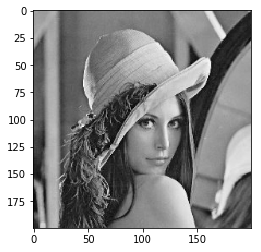

In [15]:
#Reads image
img = imread('Lena-grayscale.jpg')
print("Original image size" , img.shape)

#Greyscale
img = rgb2gray(img)

#Resizes image (200x200)
img = resize(img, (200, 200))
print("New image size", img.shape)

#Checks pixels value range
print("Minimum", img.min())
print("Maximum", img.max())

plt.imshow(img,cmap=plt.cm.gray)

2. Crea y muestra una máscara de valores booleanos del mismo tamaño que Lena (200x200), la cual
indique (True) cuáles pixeles de Lena tienen intensidad mayor o igual al 80% de las intensidades
existentes en los pixeles de Lena.


In [49]:
#Create copy of the image
lena80 = img

#80% of existing intensities
int80 = np.percentile(lena80, 80)
print("Mean intensity of 80% of pixels in Lena's image", int80)

#boolean mask of pixels with intensity greater than int80
bm80 = lena80 >= int80
print(bm80.shape)
bm80

Mean intensity of 80% of pixels in Lena's image 0.6412674509803908
(200, 200)


array([[ True, False, False, ...,  True,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

3. Crea y muestra una copia de Lena donde sean copiados los valores de intensidad de Lena indicados
(True) por la máscara del punto anterior, y donde todos los otros pixeles sean igual a 0.

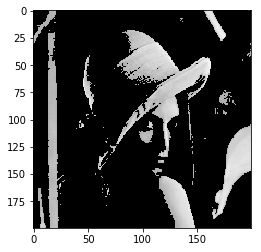

In [4]:
#Inverse boolean mask. Pixels with values less than 80% intensity
inv_bm80 = np.invert(bm80)

#All pixels with values less than 80% intensity
lena80[inv_bm80]=0
plt.imshow(lena80,cmap=plt.cm.gray)

5. Crea una función que reciba como parámetros una imágen en escala de grises y un kernel, y que
devuelva su convolución. La imagen devuelta debe ser del mismo tamaño que la de entrada. La función
debe funcionar para imágenes y kernels de tamaño arbitrario.


In [54]:
def convolve(imag, kernel):
    k = np.flip(kernel) #flipping is necessary for convolution 

    im_height, im_width = imag.shape

    h = floor(k.shape[0]/2) #Kernel height
    w = floor(k.shape[1]/2) #Kernel width

    new_imag = np.zeros(( im_width +w, im_height+h))  #Creates new image
    imag = np.pad(imag, mode='edge', pad_width=h)     #Pad original image

    for col in range(h, im_height+h): #columns
        for row in range(w, im_width+w): #rows
            new_imag[col,row] = abs(np.sum(imag[col-h:(col+(h+1)),row-w:(row+(w+1))]*k))

    return  new_imag[w:im_width+w,h:im_height+h]

6. Usando la función anterior, calcula la convolución de Lena con el siguiente kernel:


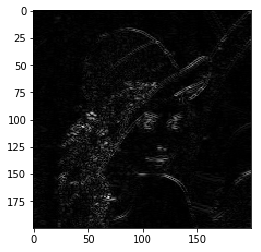

In [55]:
k6 = np.array([[-1, -1, -1], [ 2, 2, 2], [-1, -1, -1]])

#ident = np.array([[0,0,0], [ 0, 1, 0], [0, 0, 0]])
#blur = (1/2)* np.ones((3,3))
#blurBIG = (1/20)* np.ones((5,5))
#blurBIGGER = (1/20)* np.ones((9,9))

new = convolve(img,k6)
plt.imshow(new,cmap=plt.cm.gray)

 8. ¿Qué pasa si reemplazas k por su transpuesta?

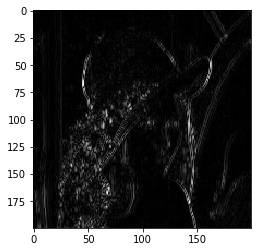

In [30]:
kt = np.matrix.transpose(k)

new = convolve(img,kt)
plt.imshow(new,cmap=plt.cm.gray)

10. Muestra el resultado de aplicar, 1 y 4 veces consecutivas, el siguiente kernel Gaussiano sobre Lena.

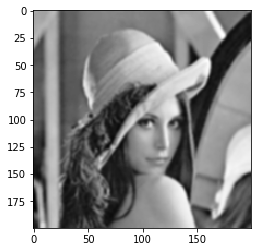

In [31]:
kGauss = (1/256)*np.array([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]])

g1 = convolve(img,kGauss)
plt.imshow(g1,cmap=plt.cm.gray)

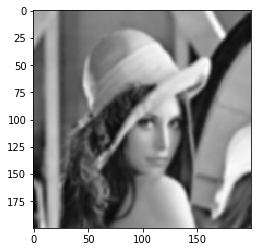

In [32]:
g2 = convolve(g1,kGauss)
plt.imshow(g2,cmap=plt.cm.gray)

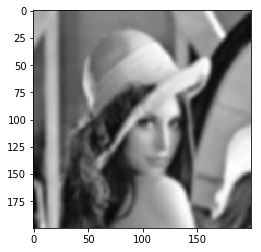

In [33]:
g3 = convolve(g2,kGauss)
plt.imshow(g3,cmap=plt.cm.gray)

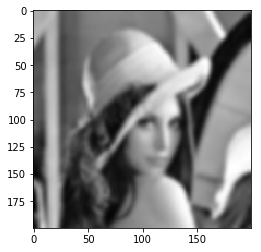

In [34]:
g4 = convolve(g3,kGauss)
plt.imshow(g4,cmap=plt.cm.gray)

11. ¿Cuántas veces debes aplicar el kernel Gaussiano sobre Lena antes de que la variación promedio de
los pixeles de la imagen resultante sea menor a 0.1?


In [ ]:
np.std(lena_blur)

Number of times before standard deviation of pixels is less than 0.1 =  126
Otherwise, with  127 convolutions, the standard deviation equals  0.09995373393885452


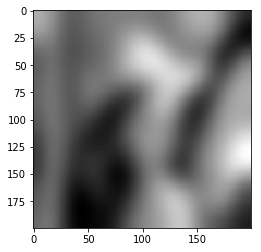

In [64]:
counter = 0
lena_blur = convolve(img,kGauss)
avg_var = np.std(lena_blur)

while (avg_var > 0.1):
    lena_blur = convolve(lena_blur,kGauss)
    avg_var = np.std(lena_blur)
    counter = counter +1 
    
print("Number of times before standard deviation of pixels is less than 0.1 = ", counter)
print("Otherwise, with " , counter+1, "convolutions, the standard deviation equals ", avg_var)
plt.imshow(lena_blur,cmap=plt.cm.gray)

12. Aplica el kernel del punto 6 sobre la imagen resultante de la convolución de Lena con el kernel
Gaussiano del punto 10. Muestra el resultado.


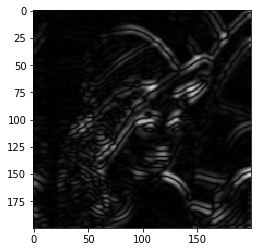

In [57]:
q12 = convolve(g4,k6)
plt.imshow(q12,cmap=plt.cm.gray)

13. ¿Cuál es la diferencia entre el resultado del punto 12 respecto del resultado del punto 6?

In [68]:
print("Punto 12")
print("Minimum", q12.min())
print("Maximum", q12.max())
print("Standard Deviation", np.std(q12))
print(" ")

print("Punto 6")
print("Minimum", new.min())
print("Maximum", new.max())
print("Standard Deviation", np.std(new))

Punto 12
Minimum 9.147292118205641e-08
Maximum 0.12527264206209687
Standard Deviation 0.011404984950496059
 
Punto 6
Minimum 1.1102230246251565e-16
Maximum 1.7971968627450805
Standard Deviation 0.1057140026511475


14. En clase mencionamos que aplicar un kernel Gaussiano repetidas veces equivale a aplicar un kernel
de amplitud alta. ¿Cuál sería la ventaja de usar una u otra estrategia?


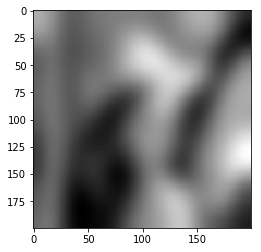

In [38]:
plt.imshow(lena_blur,cmap=plt.cm.gray)

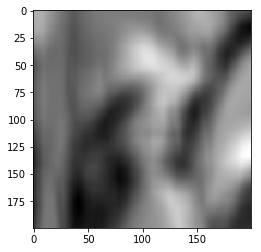

In [48]:
blurBIGGER = (1/256)*np.ones((29,29))
blur= convolve(img,blurBIGGER)
plt.imshow(blur,cmap=plt.cm.gray)

15. Aplica el kernel Gaussiano del punto 9, 4 veces sobre Lena. A continuación resta la imagen original
(Lena) de la que haya resultado despues de las 4 convoluciones. Muestra el resultado de la resta.


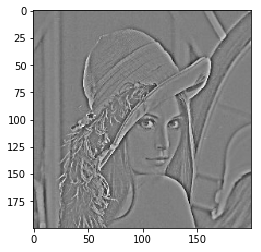

In [59]:
subtract = img-g4
plt.imshow(subtract,cmap=plt.cm.gray)


16. ¿Qué representa el resultado de la resta realizada en el punto anterior?